# Attempting to make more reasonable photometric errors

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Limiting magnitudes

This is a table of the 'depths' at 10$\sigma$ in 2" aperture as expected in the Euclid Wide survey + LSST:

In [4]:
limiting_mags = {
    'LSST_u': 24.2,
    'LSST_g': 24.5,
    'LSST_r': 23.9,
    'LSST_i': 23.6,
    'LSST_z': 23.4,
    'VIS': 24.5,
    'NISP_Y': 23.0,
    'NISP_J': 23.0,
    'NISP_H': 23.0
}

At the above magnitudes, we should reach a S/N = 10. Signal and noise are referred to in fluxes, however, so I'll have to convert the magnitudes into fluxes. But this is beneficial! Here's how Micol explained it:

This is also useful because in reality the Gaussian distribution of errors is expected on fluxes, not on their logarithm. So, you will have flim derived from $m_{lim}$, and you know that $f_{lim}/\Delta f = 10$, from which you obtain $\Delta f$. This is the number you can use as sigma for your Gaussian distribution of noise to be applied on fluxes. So, if f is the flux you have from the model SEDs, you obtain `fobs=f+np.random.normal(0,Δf)`. Then you have to convert back fluxes and errors in magnitudes.


## Converting from Magnitudes to Flux ($\mu$Jy)

$$m_{AB} = -2.5 \log_{10}f + 23.9$$

$$f = 10^{-0.4(m_{AB} -23.9)}$$



$$\frac{f}{\Delta f} = 10$$ 
$$\Delta f_{lim} = \frac{f_{lim}}{10} = S/N$$

$$f_{obs} = f + \frac{1}{\Delta f \sqrt{2 \pi}} exp \frac{f^2}{2 \Delta f^2}$$

$$m_{obs} = -2.5 \log_{10}f_{obs} + 23.9$$

$$\Delta m = \frac{2.5}{\ln(10) \frac{\Delta f }{f}} $$

In [5]:
limiting_fluxes = limiting_mags.copy()

In [6]:
for i in limiting_fluxes.keys():
    limiting_fluxes[i] = 10**(-0.4*(limiting_mags[i] - 23.9))

In [7]:
limiting_fluxes

{'LSST_u': 0.7585775750291832,
 'LSST_g': 0.5754399373371561,
 'LSST_r': 1.0,
 'LSST_i': 1.3182567385564037,
 'LSST_z': 1.5848931924611136,
 'VIS': 0.5754399373371561,
 'NISP_Y': 2.29086765276777,
 'NISP_J': 2.29086765276777,
 'NISP_H': 2.29086765276777}

In [8]:
lim_flux_err = limiting_fluxes.copy()

In [ ]:
SN = 10

In [9]:
for i in lim_flux_err.keys():
    lim_flux_err[i] = lim_flux_err[i]/SN

In [10]:
lim_flux_err

{'LSST_u': 0.07585775750291832,
 'LSST_g': 0.05754399373371562,
 'LSST_r': 0.1,
 'LSST_i': 0.13182567385564037,
 'LSST_z': 0.15848931924611137,
 'VIS': 0.05754399373371562,
 'NISP_Y': 0.22908676527677702,
 'NISP_J': 0.22908676527677702,
 'NISP_H': 0.22908676527677702}

In [71]:
lim_mag_err = lim_flux_err.copy()
for i in lim_flux_err.keys():
    lim_mag_err[i] = (2.5/np.log(10.))*np.abs(lim_flux_err[i]/limiting_fluxes[i])

In [72]:
lim_mag_err

{'LSST_u': 0.10857362047581293,
 'LSST_g': 0.10857362047581294,
 'LSST_r': 0.10857362047581294,
 'LSST_i': 0.10857362047581294,
 'LSST_z': 0.10857362047581294,
 'VIS': 0.10857362047581294,
 'NISP_Y': 0.10857362047581294,
 'NISP_J': 0.10857362047581294,
 'NISP_H': 0.10857362047581294}

## Fixing catalogue

In [15]:
cat_df = pd.read_csv('euc_phys_n100.csv', usecols=lambda x: x not in 'Unnamed: 0')
cat_df

,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,z,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l,physical
0,22.8767,21.5305,21.3565,21.3193,21.3300,21.3376,21.4182,21.5102,21.3304,3.12,0.008,0.9270,1.000000e+10,-0.3,1.0,10.0,1.0,0.4,11.719747,True
1,23.3898,22.5199,22.3328,22.2256,22.1680,22.2694,22.2117,22.2041,22.0730,2.80,0.030,0.8531,1.000000e+10,0.3,1.0,1.0,1.0,0.4,11.457722,True
2,24.3987,23.8748,23.4840,23.2050,22.9220,23.2901,22.2376,21.8403,21.3815,1.39,0.030,0.8531,1.000000e+10,-0.3,1.0,1.0,1.0,0.8,9.215104,True
3,26.4011,25.5515,24.2820,23.0510,22.9431,23.5030,22.9187,22.8742,22.9610,5.98,0.040,0.8371,1.000000e+10,0.3,1.0,3.0,1.0,0.2,12.840598,True
4,27.0062,24.8401,24.4173,24.3294,24.2898,24.3686,24.2762,24.2163,23.6780,3.27,0.200,0.7505,1.000000e+10,-0.3,1.0,1.0,1.0,0.4,11.826192,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28.1839,27.4976,26.9391,26.5276,26.2060,26.6565,25.2111,24.5608,23.9317,1.63,0.500,0.6988,1.000000e+10,0.3,1.0,1.0,1.0,0.8,9.800534,True
96,29.9735,27.8103,26.7864,26.2342,25.8753,26.4098,25.3351,24.6170,23.7938,2.67,0.008,0.9270,1.000000e+10,-0.3,1.0,3.0,1.0,1.0,11.335149,True
97,29.7707,27.7619,26.7825,26.2338,25.8889,26.4136,25.3369,24.5712,23.7304,2.57,0.010,0.9140,1.000000e+10,-0.3,1.0,10.0,1.0,1.0,11.233418,True
98,28.2347,26.8980,26.4205,25.7237,25.1974,25.8943,23.9085,23.3632,22.9485,1.58,0.800,0.6373,1.000000e+10,-0.3,1.0,0.1,0.0,0.0,9.688944,True


In [12]:
import numpy as np

## Applying photometric errors and making .cat

In [20]:
hz_cat = cat_df.copy()

In [22]:
hz_cat.drop(hz_cat.columns[[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]], axis=1, inplace=True)
hz_cat

,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H
0,22.8767,21.5305,21.3565,21.3193,21.3300,21.3376,21.4182,21.5102,21.3304
1,23.3898,22.5199,22.3328,22.2256,22.1680,22.2694,22.2117,22.2041,22.0730
2,24.3987,23.8748,23.4840,23.2050,22.9220,23.2901,22.2376,21.8403,21.3815
3,26.4011,25.5515,24.2820,23.0510,22.9431,23.5030,22.9187,22.8742,22.9610
4,27.0062,24.8401,24.4173,24.3294,24.2898,24.3686,24.2762,24.2163,23.6780
...,...,...,...,...,...,...,...,...,...
95,28.1839,27.4976,26.9391,26.5276,26.2060,26.6565,25.2111,24.5608,23.9317
96,29.9735,27.8103,26.7864,26.2342,25.8753,26.4098,25.3351,24.6170,23.7938
97,29.7707,27.7619,26.7825,26.2338,25.8889,26.4136,25.3369,24.5712,23.7304
98,28.2347,26.8980,26.4205,25.7237,25.1974,25.8943,23.9085,23.3632,22.9485


In [23]:
hz_cat_copy = hz_cat.copy()

In [24]:
for name in lim_flux_err.keys():
    mag = hz_cat[name]
    flux = 10**(-0.4*(mag - 23.9))
    noise = np.random.normal(0, lim_flux_err[name])
    obs_flux = flux + noise
    flux_err = lim_flux_err[name]
    obs_mag = -2.5*np.log(obs_flux) + 23.9
    dmag=(2.5/np.log(10.))*np.abs(flux_err/flux)
    hz_cat_copy[name] = obs_mag
    hz_cat_copy['delta_'+ name] = dmag

/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
hz_cat_copy

,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,delta_LSST_u,delta_LSST_g,delta_LSST_r,delta_LSST_i,delta_LSST_z,delta_VIS,delta_NISP_Y,delta_NISP_J,delta_NISP_H
0,21.562757,18.446597,18.055888,18.001045,18.026425,18.011093,18.185776,18.338487,17.994934,0.032093,0.007046,0.010431,0.013288,0.016133,0.005899,0.025293,0.027530,0.023328
1,22.755757,20.728606,20.322255,20.145535,20.008273,20.171995,20.013234,19.884790,19.716331,0.051481,0.017526,0.025636,0.030617,0.034908,0.013915,0.052530,0.052163,0.046230
2,25.126369,23.864351,23.032302,22.556372,21.844904,22.564303,20.072888,19.078009,18.113159,0.130378,0.061044,0.074016,0.075461,0.069908,0.035626,0.053798,0.037312,0.024453
3,30.199478,27.809319,24.971476,22.166282,21.897510,23.069647,21.641794,21.337327,21.790643,0.824450,0.285973,0.154356,0.065482,0.071279,0.043344,0.100741,0.096695,0.104743
4,32.089012,26.119453,25.309626,25.692159,25.573609,25.168870,24.770846,23.996144,23.491993,1.439476,0.148513,0.174841,0.212561,0.246402,0.096198,0.351726,0.332847,0.202733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,32.905078,35.705853,NaN,NaN,32.547818,26.929847,24.589055,24.104038,4.258771,1.716976,1.783875,1.609772,1.439211,0.791269,0.832079,0.457135,0.256097
96,NaN,33.921009,33.931607,NaN,NaN,31.310587,27.216693,24.681124,23.770515,22.137283,2.290047,1.549831,1.228582,1.061315,0.630441,0.932748,0.481420,0.225551
97,NaN,33.755423,33.897000,NaN,NaN,31.327418,27.220858,24.606196,23.617862,18.365566,2.190203,1.544274,1.228130,1.074693,0.632651,0.934296,0.461535,0.212757
98,NaN,31.192663,31.589105,40.392460,29.277849,29.377116,23.922859,22.355921,21.761250,4.462768,0.988381,1.106431,0.767723,0.568440,0.392143,0.250683,0.151707,0.103544


In [26]:
hz_cat_copy['z'] = cat_df['z']

In [27]:
hz_cat_copy

,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,delta_LSST_u,delta_LSST_g,delta_LSST_r,delta_LSST_i,delta_LSST_z,delta_VIS,delta_NISP_Y,delta_NISP_J,delta_NISP_H,z
0,21.562757,18.446597,18.055888,18.001045,18.026425,18.011093,18.185776,18.338487,17.994934,0.032093,0.007046,0.010431,0.013288,0.016133,0.005899,0.025293,0.027530,0.023328,3.12
1,22.755757,20.728606,20.322255,20.145535,20.008273,20.171995,20.013234,19.884790,19.716331,0.051481,0.017526,0.025636,0.030617,0.034908,0.013915,0.052530,0.052163,0.046230,2.80
2,25.126369,23.864351,23.032302,22.556372,21.844904,22.564303,20.072888,19.078009,18.113159,0.130378,0.061044,0.074016,0.075461,0.069908,0.035626,0.053798,0.037312,0.024453,1.39
3,30.199478,27.809319,24.971476,22.166282,21.897510,23.069647,21.641794,21.337327,21.790643,0.824450,0.285973,0.154356,0.065482,0.071279,0.043344,0.100741,0.096695,0.104743,5.98
4,32.089012,26.119453,25.309626,25.692159,25.573609,25.168870,24.770846,23.996144,23.491993,1.439476,0.148513,0.174841,0.212561,0.246402,0.096198,0.351726,0.332847,0.202733,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,32.905078,35.705853,NaN,NaN,32.547818,26.929847,24.589055,24.104038,4.258771,1.716976,1.783875,1.609772,1.439211,0.791269,0.832079,0.457135,0.256097,1.63
96,NaN,33.921009,33.931607,NaN,NaN,31.310587,27.216693,24.681124,23.770515,22.137283,2.290047,1.549831,1.228582,1.061315,0.630441,0.932748,0.481420,0.225551,2.67
97,NaN,33.755423,33.897000,NaN,NaN,31.327418,27.220858,24.606196,23.617862,18.365566,2.190203,1.544274,1.228130,1.074693,0.632651,0.934296,0.461535,0.212757,2.57
98,NaN,31.192663,31.589105,40.392460,29.277849,29.377116,23.922859,22.355921,21.761250,4.462768,0.988381,1.106431,0.767723,0.568440,0.392143,0.250683,0.151707,0.103544,1.58


In [35]:
hz_cat_copy.isnull().sum().sum()

48

In [36]:
cat_final = hz_cat_copy.dropna()

In [37]:
cat_final

,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,delta_LSST_u,delta_LSST_g,delta_LSST_r,delta_LSST_i,delta_LSST_z,delta_VIS,delta_NISP_Y,delta_NISP_J,delta_NISP_H,z
0,21.562757,18.446597,18.055888,18.001045,18.026425,18.011093,18.185776,18.338487,17.994934,0.032093,0.007046,0.010431,0.013288,0.016133,0.005899,0.025293,0.027530,0.023328,3.12
1,22.755757,20.728606,20.322255,20.145535,20.008273,20.171995,20.013234,19.884790,19.716331,0.051481,0.017526,0.025636,0.030617,0.034908,0.013915,0.052530,0.052163,0.046230,2.80
2,25.126369,23.864351,23.032302,22.556372,21.844904,22.564303,20.072888,19.078009,18.113159,0.130378,0.061044,0.074016,0.075461,0.069908,0.035626,0.053798,0.037312,0.024453,1.39
3,30.199478,27.809319,24.971476,22.166282,21.897510,23.069647,21.641794,21.337327,21.790643,0.824450,0.285973,0.154356,0.065482,0.071279,0.043344,0.100741,0.096695,0.104743,5.98
4,32.089012,26.119453,25.309626,25.692159,25.573609,25.168870,24.770846,23.996144,23.491993,1.439476,0.148513,0.174841,0.212561,0.246402,0.096198,0.351726,0.332847,0.202733,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,14.799846,14.815522,14.639436,14.193292,14.240745,14.424089,14.060887,13.377016,12.498434,0.002161,0.001650,0.002670,0.002937,0.003598,0.001410,0.004858,0.003708,0.002599,0.69
92,10.237126,9.516975,8.873188,8.701925,8.548978,8.764696,8.199599,7.949542,7.808813,0.000349,0.000198,0.000266,0.000328,0.000371,0.000147,0.000466,0.000422,0.000398,0.23
93,6.147569,4.686319,3.740678,2.909739,2.025976,3.131172,0.601984,-0.057744,-0.857849,0.000068,0.000029,0.000034,0.000032,0.000027,0.000015,0.000022,0.000017,0.000012,0.06
94,18.203076,16.206271,14.192672,13.058105,12.403042,13.453609,10.693540,9.165197,7.981061,0.008418,0.002877,0.002233,0.001867,0.001729,0.000956,0.001263,0.000686,0.000427,0.29


In [38]:
cat_final.to_csv('subsetmaybe.csv')

In [52]:
cat_final.insert(loc=0, column='ID', value=np.arange(1, len(cat_final)+1))


In [53]:
cat_final

,ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,delta_LSST_u,delta_LSST_g,delta_LSST_r,delta_LSST_i,delta_LSST_z,delta_VIS,delta_NISP_Y,delta_NISP_J,delta_NISP_H,z
0,1,21.562757,18.446597,18.055888,18.001045,18.026425,18.011093,18.185776,18.338487,17.994934,0.032093,0.007046,0.010431,0.013288,0.016133,0.005899,0.025293,0.027530,0.023328,3.12
1,2,22.755757,20.728606,20.322255,20.145535,20.008273,20.171995,20.013234,19.884790,19.716331,0.051481,0.017526,0.025636,0.030617,0.034908,0.013915,0.052530,0.052163,0.046230,2.80
2,3,25.126369,23.864351,23.032302,22.556372,21.844904,22.564303,20.072888,19.078009,18.113159,0.130378,0.061044,0.074016,0.075461,0.069908,0.035626,0.053798,0.037312,0.024453,1.39
3,4,30.199478,27.809319,24.971476,22.166282,21.897510,23.069647,21.641794,21.337327,21.790643,0.824450,0.285973,0.154356,0.065482,0.071279,0.043344,0.100741,0.096695,0.104743,5.98
4,5,32.089012,26.119453,25.309626,25.692159,25.573609,25.168870,24.770846,23.996144,23.491993,1.439476,0.148513,0.174841,0.212561,0.246402,0.096198,0.351726,0.332847,0.202733,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,74,14.799846,14.815522,14.639436,14.193292,14.240745,14.424089,14.060887,13.377016,12.498434,0.002161,0.001650,0.002670,0.002937,0.003598,0.001410,0.004858,0.003708,0.002599,0.69
92,75,10.237126,9.516975,8.873188,8.701925,8.548978,8.764696,8.199599,7.949542,7.808813,0.000349,0.000198,0.000266,0.000328,0.000371,0.000147,0.000466,0.000422,0.000398,0.23
93,76,6.147569,4.686319,3.740678,2.909739,2.025976,3.131172,0.601984,-0.057744,-0.857849,0.000068,0.000029,0.000034,0.000032,0.000027,0.000015,0.000022,0.000017,0.000012,0.06
94,77,18.203076,16.206271,14.192672,13.058105,12.403042,13.453609,10.693540,9.165197,7.981061,0.008418,0.002877,0.002233,0.001867,0.001729,0.000956,0.001263,0.000686,0.000427,0.29


In [54]:
np.savetxt(r'test78.cat', cat_final.values, fmt=' '.join(['%i'] + ['%1.4f']*19))

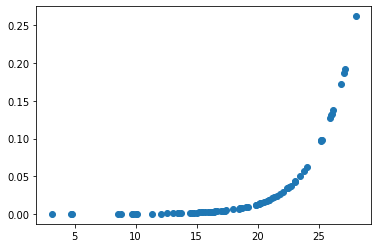

In [67]:
plt.scatter(cat_final['VIS'], cat_final['delta_VIS'])